In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("final_clean_data.csv")

In [4]:
df = df.drop('for_sale', 1)
df = df.drop('description', 1)
df

,price(€),monthly(€),energy_performance_diagnosis_(kWhEP/m².year),Greenhouse_gas_emission(kgeqCO2/m².year),terrace,view,area(m²),room,bedroom,year_of_construction,...,ZAC Saint Sebastien,Zone Agricole,Zone Industrielle,Zone Industrielle du Prat,Zone Nord Est Urbaine,Zone Ouest Urbaine,Zone Pavillonnaire,Zone Pietonne,Zone Rurale Nord,Île de Nantes
0,349500,1449,150.0,35.0,1,0,105.00,5,3,0,...,0,0,0,0,0,0,0,0,0,0
1,335000,1389,0.0,0.0,1,0,185.00,5,4,1976,...,0,0,0,0,0,0,0,0,0,0
2,2490000,10270,99.0,19.0,0,1,220.00,5,5,0,...,0,0,0,0,0,0,0,0,0,0
3,356000,1476,0.0,0.0,0,0,130.00,5,3,0,...,0,0,0,0,0,0,0,0,0,0
4,388500,1610,214.0,11.0,1,0,102.00,6,4,1986,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,148000,619,216.0,11.0,1,0,127.00,5,4,1988,...,0,0,0,0,0,0,0,0,0,0
1988,75240,317,305.0,0.0,0,0,140.00,5,2,1600,...,0,0,0,0,0,0,0,0,0,0
1989,375000,1554,167.0,7.0,1,0,72.45,3,2,0,...,0,0,0,0,0,0,0,0,0,0
1990,520000,2152,125.0,3.0,1,0,110.00,4,3,2007,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y1_price = pd.DataFrame(np.log(df['price(€)']))
y2_monthly = pd.DataFrame(np.log(df['monthly(€)']))
df = df.drop('price(€)', 1)
df = df.drop('monthly(€)', 1)
x = pd.DataFrame(df)
y1_price

,price(€)
0,12.764259
1,12.721886
2,14.727793
3,12.782686
4,12.870048
...,...
1987,11.904968
1988,11.228438
1989,12.834681
1990,13.161584


<h1>Prediction of the prices</h1>

<h2>Linear Regression</h2>

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split    

model=LinearRegression()         

X_train, X_test, Y_train_price, Y_test_price = train_test_split(x, y1_price.values.ravel(), test_size=0.2)    

model.fit(X_train, Y_train_price)            
predictions=model.predict(X_test)

In [7]:
print(model.score(X_train, Y_train_price))

0.9352251202608691


<h2>Random Forest Regressor</h2>

In [8]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

X_train, X_test, Y_train_price, Y_test_price = train_test_split(x, y1_price.values.ravel(), test_size=0.2)    

model.fit(X_train, Y_train_price)           
predictions=model.predict(X_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [9]:
print(model.score(X_train, Y_train_price))

0.9018513155936252


<h2>Decision Tree Regressor</h2>

In [10]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

X_train, X_test, Y_train_price, Y_test_price = train_test_split(x, y1_price.values.ravel(), test_size=0.2)     

model.fit(X_train, Y_train_price)            
predictions=model.predict(X_test)

In [11]:
print(model.score(X_train, Y_train_price))

0.9999999994918902


<h2>Regression using Keras</h2>

In [12]:
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

X_train, X_test, Y_train_price, Y_test_price = train_test_split(x, y1_price.values.ravel(), test_size=0.2)    

model = Sequential()
n_cols = x.shape[1]
model.add(Dense(100,activation='relu',input_shape=(n_cols,)))
model.add(Dense(120,activation='relu'))
model.add(Dense(130,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

Using TensorFlow backend.


W0325 22:54:03.409914 12496 deprecation_wrapper.py:119] From C:\Users\admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 1274 samples, validate on 319 samples
Epoch 1/100
1274/1274 [==============================] - 5s 4ms/step - loss: 1469.2912 - accuracy: 0.0000e+00 - val_loss: 27.3281 - val_accuracy: 0.0000e+00
Epoch 2/100
1274/1274 [==============================] - 2s 2ms/step - loss: 597.0698 - accuracy: 0.0000e+00 - val_loss: 19.0325 - val_accuracy: 0.0000e+00
Epoch 3/100
1274/1274 [==============================] - 2s 2ms/step - loss: 102.9750 - accuracy: 0.0000e+00 - val_loss: 30.8408 - val_accuracy: 0.0000e+00
Epoch 4/100
1274/1274 [==============================] - 2s 2ms/step - loss: 540.6303 - accuracy: 0.0000e+00 - val_loss: 10.1299 - val_accuracy: 0.0000e+00
Epoch 5/100
1274/1274 [==============================] - 2s 2ms/step - loss: 39.5965 - accuracy: 0.0000e+00 - val_loss: 11.0327 - val_accuracy: 0.0000e+00
Epoch 6/100
1274/1274 [==============================] - 2s 2ms/step - loss: 24.3254 - accuracy: 0.0000e+00 - val_loss: 7.3928 - val_accuracy: 0.0000e+00
Epoch 7/100
1274/12

Epoch 54/100
1274/1274 [==============================] - 2s 2ms/step - loss: 1.8903 - accuracy: 0.0000e+00 - val_loss: 1.0249 - val_accuracy: 0.0000e+00
Epoch 55/100
1274/1274 [==============================] - 2s 2ms/step - loss: 2.2996 - accuracy: 0.0000e+00 - val_loss: 1.6871 - val_accuracy: 0.0000e+00
Epoch 56/100
1274/1274 [==============================] - 2s 2ms/step - loss: 2.9586 - accuracy: 0.0000e+00 - val_loss: 0.6935 - val_accuracy: 0.0000e+00
Epoch 57/100
1274/1274 [==============================] - 2s 2ms/step - loss: 1.1991 - accuracy: 0.0000e+00 - val_loss: 0.4682 - val_accuracy: 0.0000e+00
Epoch 58/100
1274/1274 [==============================] - 2s 2ms/step - loss: 4.9262 - accuracy: 0.0000e+00 - val_loss: 0.5255 - val_accuracy: 0.0000e+00
Epoch 59/100
1274/1274 [==============================] - 2s 2ms/step - loss: 1.2286 - accuracy: 0.0000e+00 - val_loss: 0.6990 - val_accuracy: 0.0000e+00
Epoch 60/100
1274/1274 [==============================] - 2s 2ms/step - loss

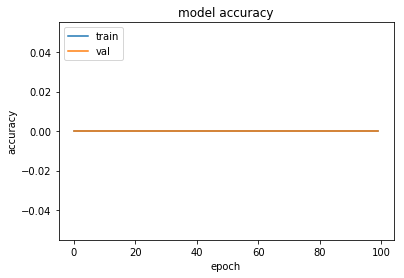

In [13]:
history = model.fit(X_train, Y_train_price,validation_split = 0.2, epochs=100, batch_size=5)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

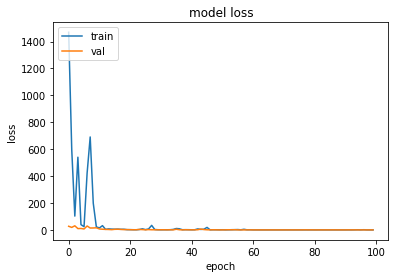

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<h1>Prediction of the monthly prices</h1>

<h2>Linear Regression</h2>

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split    

model=LinearRegression()         

X_train, X_test, Y_train_monthly, Y_test_monthly = train_test_split(x, y2_monthly.values.ravel(), test_size=0.2)    

model.fit(X_train, Y_train_monthly)            
predictions=model.predict(X_test)

In [16]:
print(model.score(X_train, Y_train_monthly))

0.9555005469391975


<h2>Random Forest Regressor</h2>

In [17]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

X_train, X_test, Y_train_monthly, Y_test_monthly = train_test_split(x, y2_monthly.values.ravel(), test_size=0.2)    

model.fit(X_train, Y_train_monthly)           
predictions=model.predict(X_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
print(model.score(X_train, Y_train_monthly))

0.9040335441452542


<h2>Decision Tree Regressor</h2>

In [19]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

X_train, X_test, Y_train_monthly, Y_test_monthly = train_test_split(x, y2_monthly.values.ravel(), test_size=0.2)     

model.fit(X_train, Y_train_monthly)            
predictions=model.predict(X_test)

In [20]:
print(model.score(X_train, Y_train_monthly))

0.9999999998093918


<h2>Regression using Keras</h2>

In [21]:
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

X_train, X_test, Y_train_monthly, Y_test_monthly = train_test_split(x, y2_monthly.values.ravel(), test_size=0.2)    

model = Sequential()
n_cols = x.shape[1]
model.add(Dense(100,activation='relu',input_shape=(n_cols,)))
model.add(Dense(120,activation='relu'))
model.add(Dense(130,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

Train on 1274 samples, validate on 319 samples
Epoch 1/6
1274/1274 [==============================] - 2s 2ms/step - loss: 732.6291 - accuracy: 0.0000e+00 - val_loss: 30.1995 - val_accuracy: 0.0000e+00
Epoch 2/6
1274/1274 [==============================] - 2s 2ms/step - loss: 441.5832 - accuracy: 0.0000e+00 - val_loss: 39.2631 - val_accuracy: 0.0000e+00
Epoch 3/6
1274/1274 [==============================] - 2s 2ms/step - loss: 115.5648 - accuracy: 0.0000e+00 - val_loss: 4.0530 - val_accuracy: 0.0000e+00
Epoch 4/6
1274/1274 [==============================] - 2s 2ms/step - loss: 28.9201 - accuracy: 0.0000e+00 - val_loss: 14.5652 - val_accuracy: 0.0000e+00
Epoch 5/6
1274/1274 [==============================] - 2s 2ms/step - loss: 16.4366 - accuracy: 0.0000e+00 - val_loss: 95.7523 - val_accuracy: 0.0000e+00
Epoch 6/6
1274/1274 [==============================] - 2s 2ms/step - loss: 28.5709 - accuracy: 0.0000e+00 - val_loss: 2.3076 - val_accuracy: 0.0000e+00


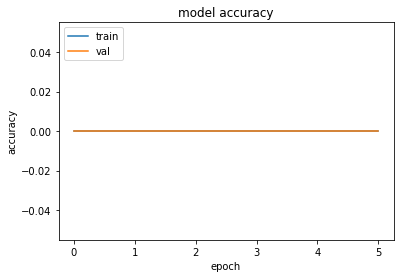

In [22]:
history = model.fit(X_train, Y_train_monthly,validation_split = 0.2, epochs=6, batch_size=5)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

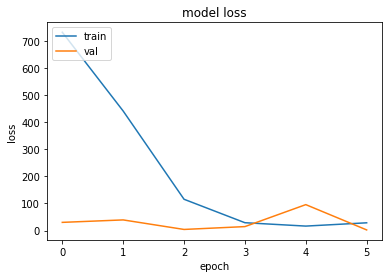

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()